In [1]:
%pip install lazypredict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from lazypredict.Supervised import LazyClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [11]:
df["TotalCharges"].isnull().sum()

np.int64(0)

In [12]:
df = df.drop("customerID", axis = 1)

In [13]:
df.duplicated().sum()

np.int64(22)

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [16]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No",1:"Yes"})

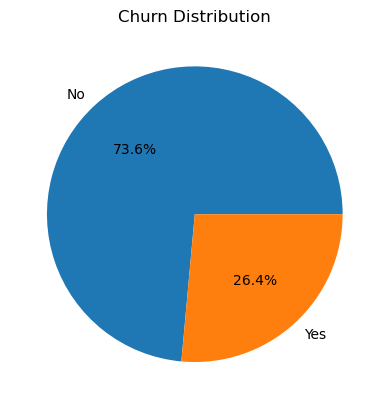

In [17]:
df["Churn"].value_counts(normalize=True).plot(kind="pie",autopct="%1.1f%%",title="Churn Distribution") 
plt.ylabel("")
plt.show()

In [18]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"\nWe have {len(categorical_features)} catecategorical features : {categorical_features}")

We have 3 numerical features : ['tenure', 'MonthlyCharges', 'TotalCharges']

We have 17 catecategorical features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [19]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7021.00,7021.00,7021.00
mean,32.47,64.85,2286.77
std,24.53,30.07,2266.86
min,0.00,18.25,0.00
25%,9.00,35.75,403.35
50%,29.00,70.40,1400.55
75%,55.00,89.90,3801.70
max,72.00,118.75,8684.80


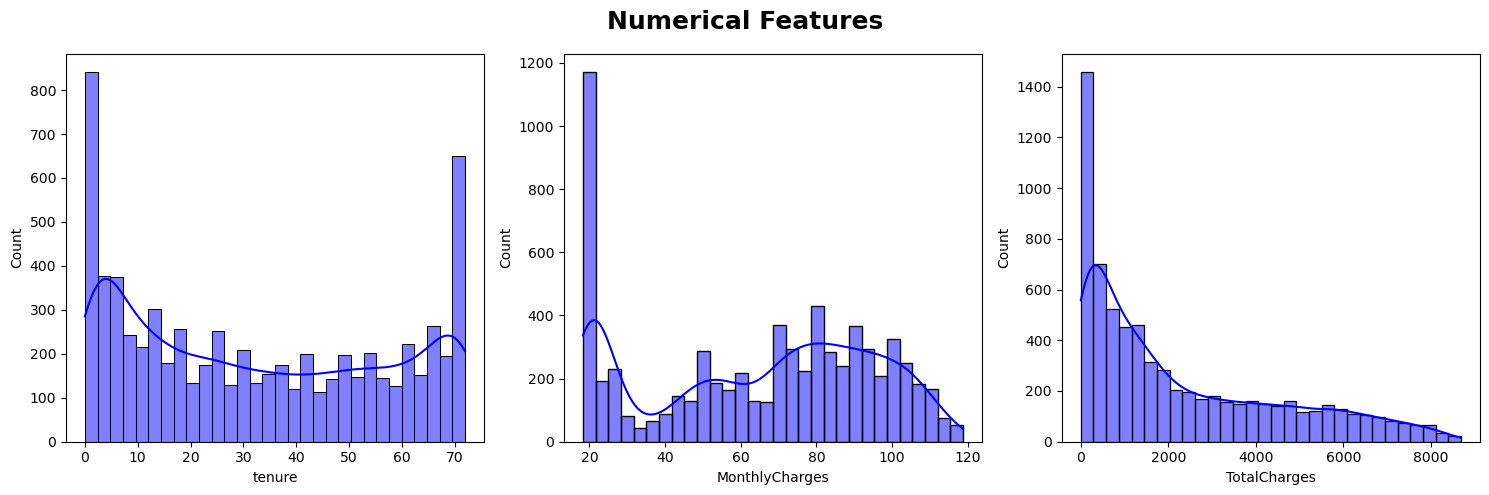

In [20]:
plt.figure(figsize=(15,5))
plt.suptitle("Numerical Features", fontsize = 18, fontweight = "bold")

for i, feature in enumerate(numeric_features):
    plt.subplot(1,3,i+1)
    sns.histplot(x=df[feature], bins=30, color="b", kde=True)  
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()

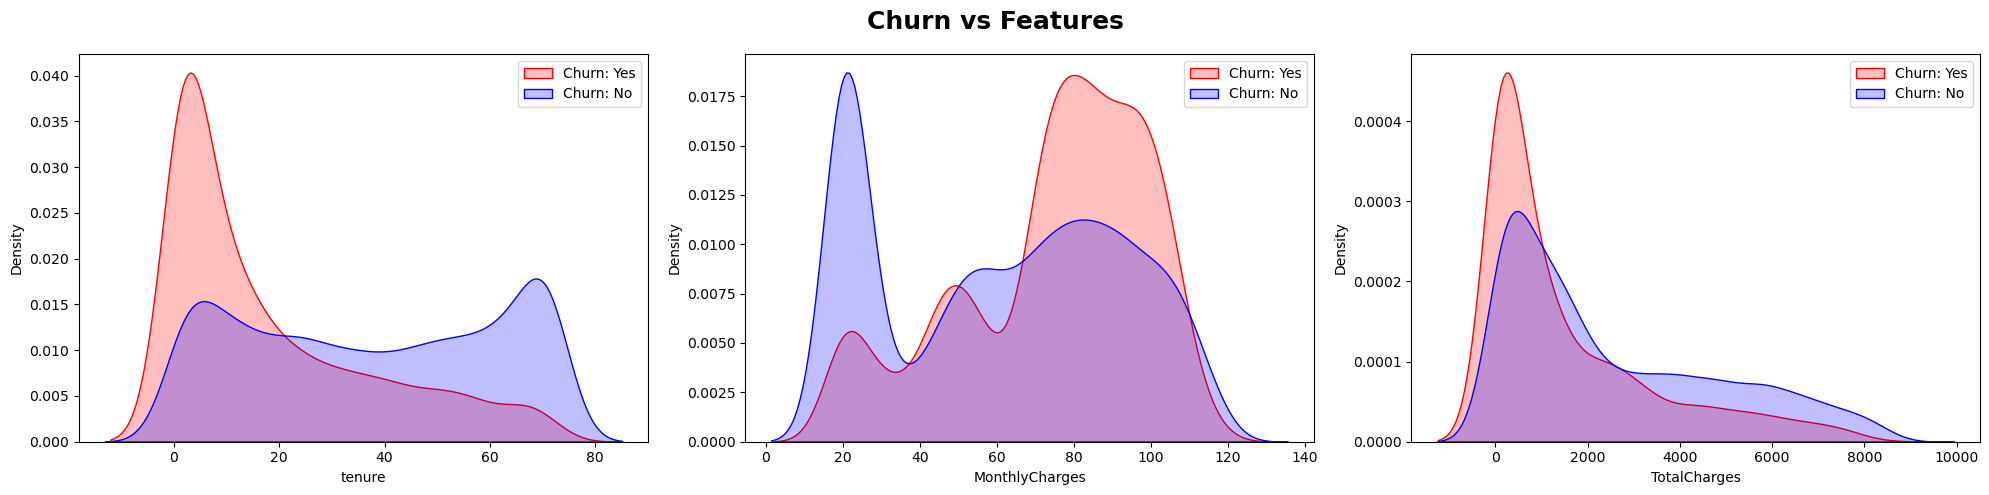

In [21]:
plt.figure(figsize=(20,5))
plt.suptitle("Churn vs Features", fontsize = 18, fontweight = "bold")
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(data=df[df['Churn'] == 'Yes'], x=feature, fill=True, color='r', label='Churn: Yes')
    sns.kdeplot(data=df[df['Churn'] == 'No'], x=feature, fill=True, color='b', label='Churn: No')
    plt.xlabel(feature)
    plt.legend()
    plt.tight_layout()
plt.show()

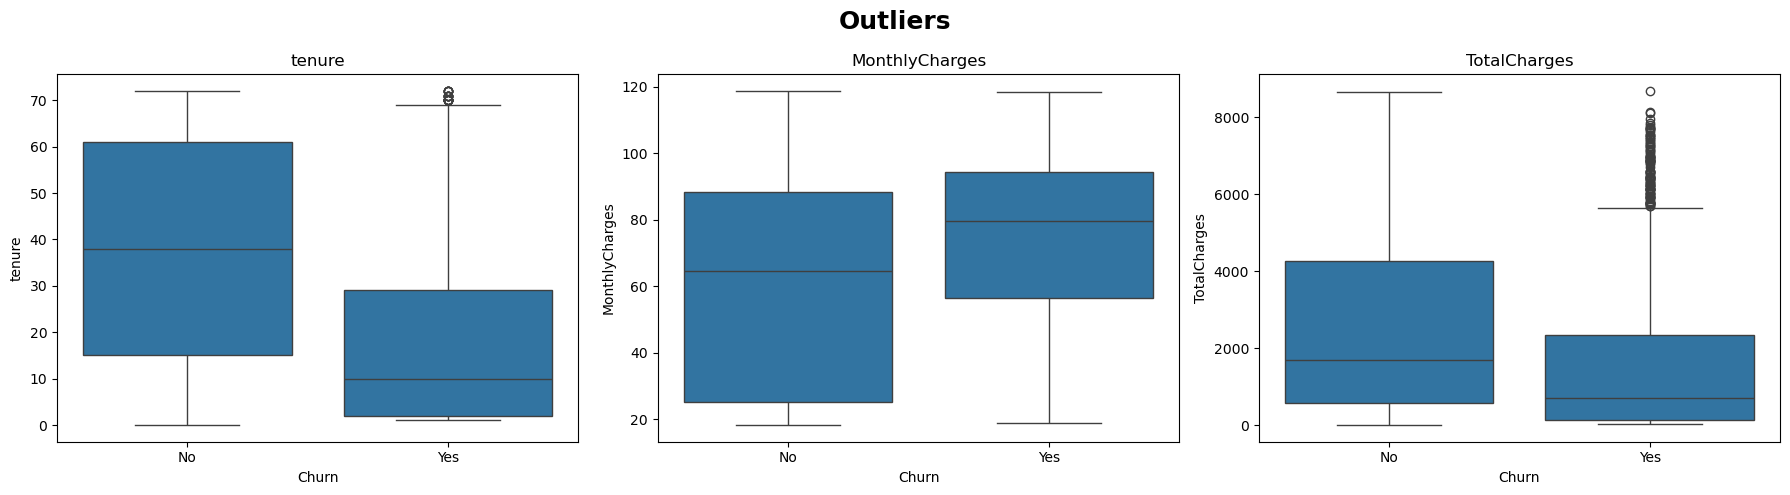

In [22]:
plt.figure(figsize=(18,5))
plt.suptitle("Outliers", fontsize=18, fontweight='bold')

for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df["Churn"] ,y=df[feature])
    plt.title(f"{feature}")
    plt.tight_layout()

plt.show()

In [23]:
df["ChurnValue"] = df["Churn"].map({"No":0,"Yes":1})

<Axes: >

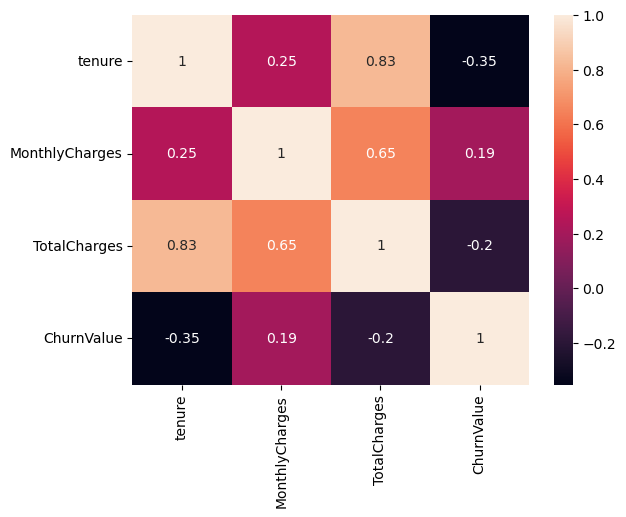

In [24]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot = True)

In [25]:
df = df.drop("ChurnValue", axis =1)

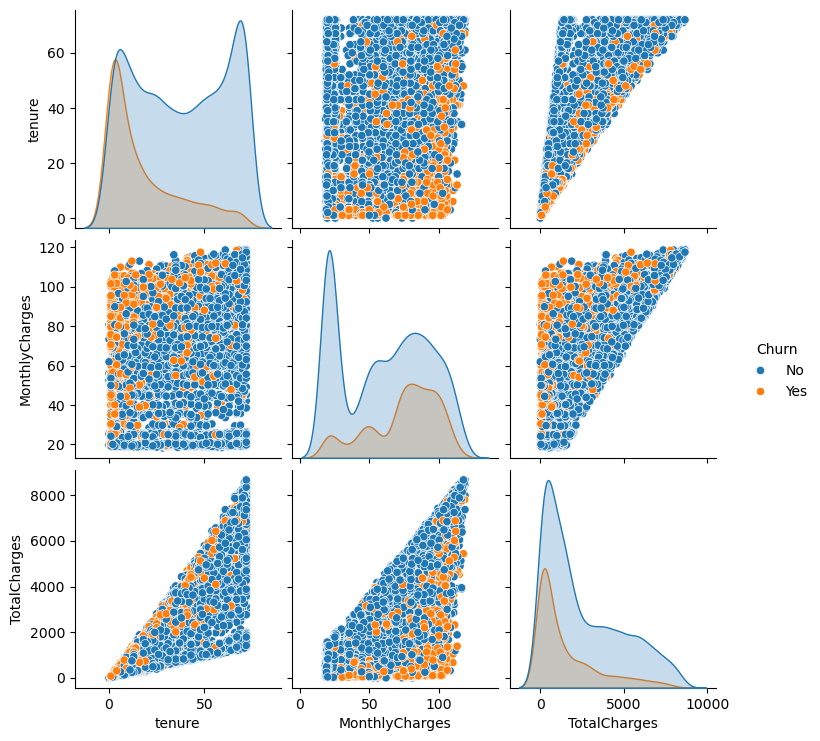

In [26]:
sns.pairplot(df,hue="Churn")
plt.show()

In [27]:
for feature in categorical_features:
    print(feature,df[feature].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen ['No' 'Yes']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No in

In [28]:
for feature in categorical_features:
    print(df[feature].value_counts())
    print("-"*50)

gender
Male      3541
Female    3480
Name: count, dtype: int64
--------------------------------------------------
SeniorCitizen
No     5880
Yes    1141
Name: count, dtype: int64
--------------------------------------------------
Partner
No     3619
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
--------------------------------------------------
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------------------------------------
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
--------------------------------------------------
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype

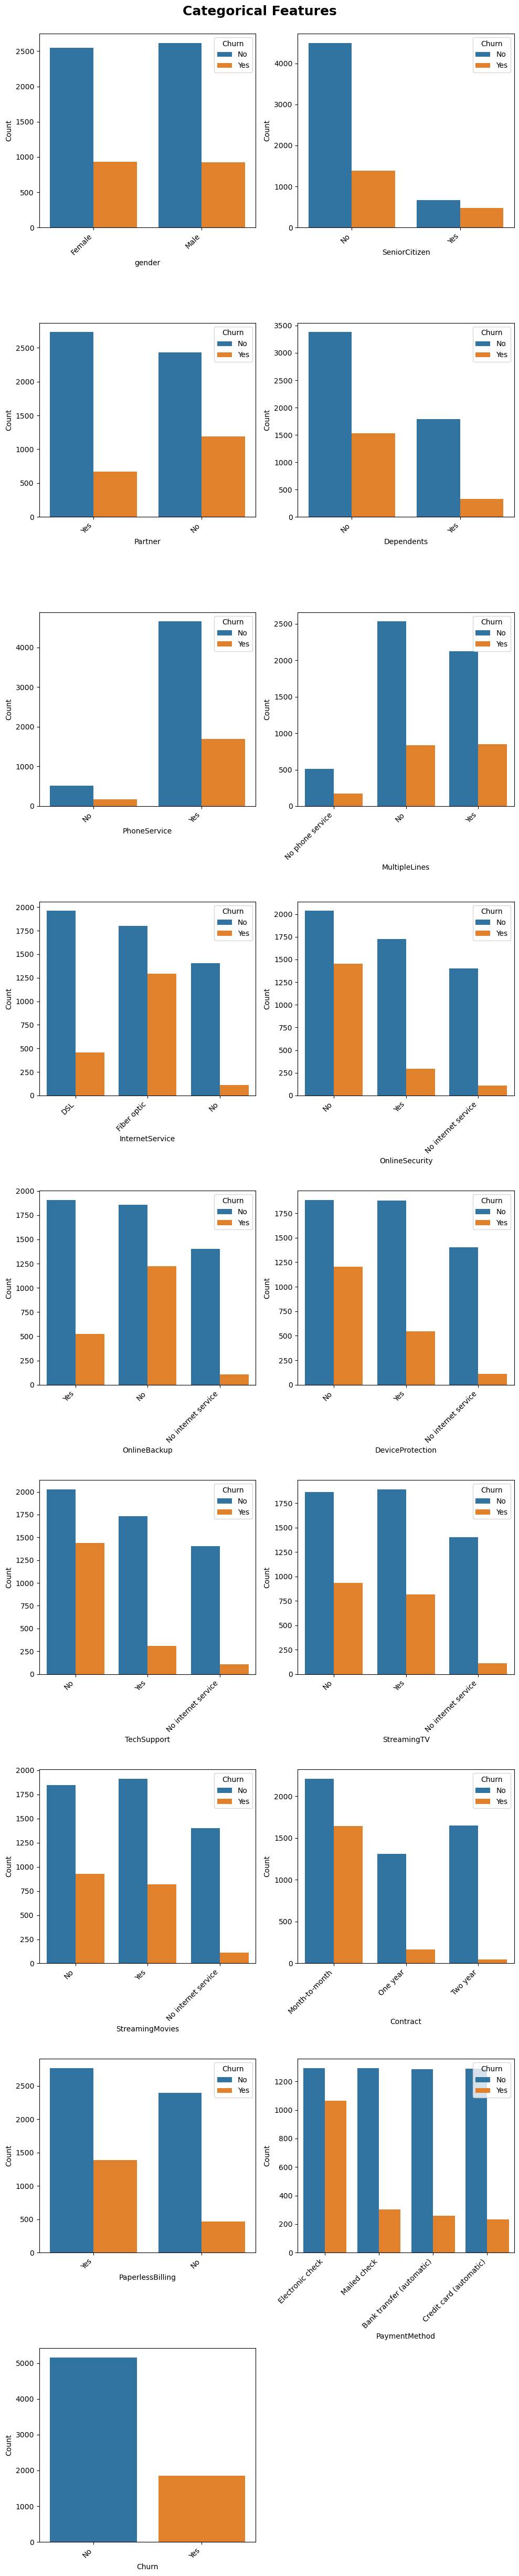

In [29]:
plt.figure(figsize=(10, 50))
plt.suptitle('Categorical Features', fontsize=18, fontweight='bold')
for i, col in enumerate(categorical_features):
    plt.subplot(9, 2, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [30]:
pd.crosstab(df["Contract"], df["Churn"],normalize="index")

Churn,No,Yes
Contract,,
Month-to-month,0.57,0.43
One year,0.89,0.11
Two year,0.97,0.03


In [31]:
pd.crosstab(df["InternetService"], df["Churn"], normalize="index")

Churn,No,Yes
InternetService,,
DSL,0.81,0.19
Fiber optic,0.58,0.42
No,0.93,0.07


In [32]:
pd.crosstab(df["PaymentMethod"], df["Churn"], normalize="index")

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.83,0.17
Credit card (automatic),0.85,0.15
Electronic check,0.55,0.45
Mailed check,0.81,0.19


In [33]:
pd.crosstab(df["TechSupport"],df["Churn"],normalize="index")

Churn,No,Yes
TechSupport,,
No,0.58,0.42
No internet service,0.93,0.07
Yes,0.85,0.15


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [35]:
internet_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [36]:
df["Churn"] = df["Churn"].map({"No":0,"Yes":1})

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [38]:
X = df.drop(["Churn"], axis = 1)
y = df["Churn"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [40]:
numeric_features = ['tenure', 'MonthlyCharges']
binary_features = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","PaperlessBilling","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
categorical_features = ["InternetService","Contract","PaymentMethod"]

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bin", OneHotEncoder(drop='if_binary',handle_unknown="ignore"), binary_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop"
)

In [42]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
clf = LazyClassifier()
models, predictions = clf.fit(X_train_prep, X_test_prep, y_train, y_test);

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1485, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264423 -> initscore=-1.023105
[LightGBM] [Info] Start training from score -1.023105


In [43]:
models.sort_values(by="Accuracy", ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifier,0.80,0.70,0.70,0.79,0.06
RidgeClassifierCV,0.80,0.70,0.70,0.79,0.06
LinearSVC,0.80,0.71,0.71,0.80,0.06
LogisticRegression,0.80,0.71,0.71,0.79,0.08
CalibratedClassifierCV,0.80,0.71,0.71,0.79,0.17
LinearDiscriminantAnalysis,0.80,0.71,0.71,0.79,0.63
SVC,0.80,0.70,0.70,0.79,2.71
NuSVC,0.80,0.67,0.67,0.78,2.73
AdaBoostClassifier,0.79,0.69,0.69,0.78,0.47


In [44]:
model = LogisticRegression()

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

params= [
    {
        "model__penalty": ["l1"],
        "model__C": [100, 10, 1, 0.1, 0.01],
        "model__solver": ["liblinear", "saga"],
        "model__class_weight": ["balanced"]
    },
    {
        "model__penalty": ["l2"],
        "model__C": [100, 10, 1, 0.1, 0.01],
        "model__solver": ["liblinear", "saga", "newton-cg", "sag", "newton-cholesky"],
        "model__class_weight": ["balanced"]
    }
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=pipeline, param_grid=params, cv=cv, scoring="roc_auc", n_jobs=-1, verbose=2)


grid.fit(X_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

custom_threshold = 0.45
y_pred_custom = (y_proba >= custom_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 35 candidates, totalling 175 fits
{'model__C': 0.1, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.77      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.75      1405

[[755 278]
 [ 85 287]]
ROC-AUC: 0.8383167306831548
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.48      0.81      0.61       372

    accuracy                           0.72      1405
   macro avg       0.70      0.75      0.69      1405
weighted avg       0.80      0.72      0.74      1405

[[708 325]
 [ 69 303]]
ROC-AUC: 0.8383167306831548


In [45]:
logistic = LogisticRegression(
    penalty="l1",
    C=0.1,
    solver="liblinear",
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)
pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ("model",logistic)
])

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.77      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.75      1405

[[755 278]
 [ 85 287]]
0.8383219352756873


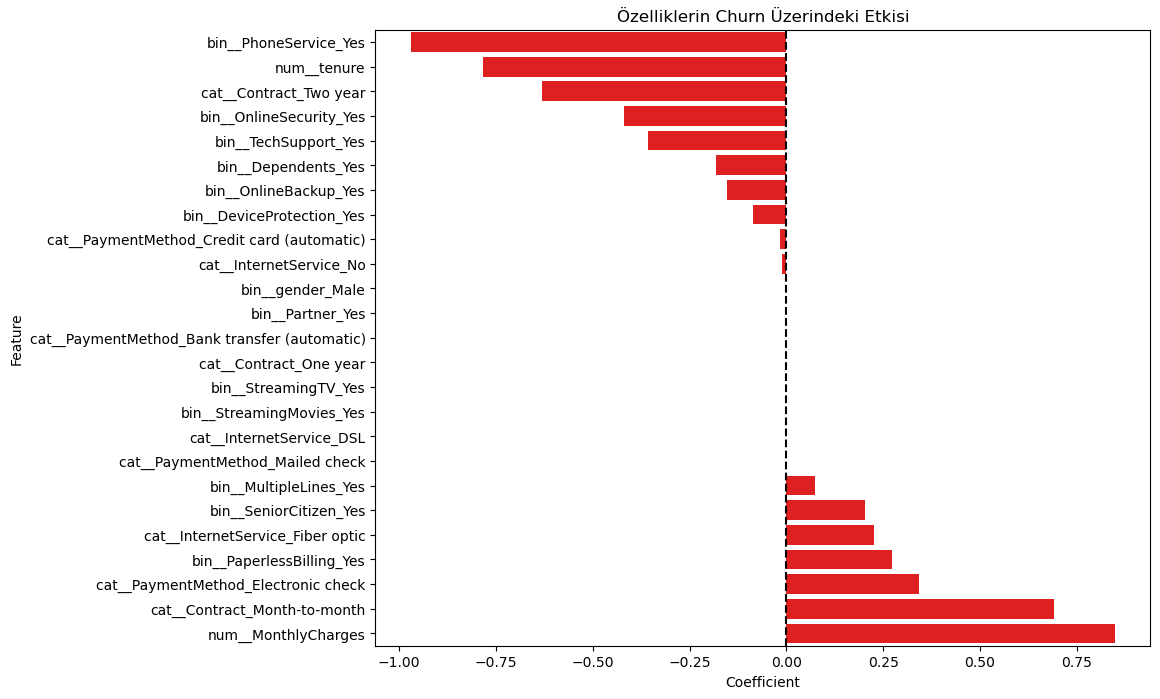

In [46]:
model = pipeline.named_steps["model"]
preprocess = pipeline.named_steps["preprocessor"]

feature_names = preprocess.get_feature_names_out()

coefficients = model.coef_[0]

df_effect = pd.DataFrame({"Feature": feature_names,"Coefficient": coefficients})
df_effect = df_effect.sort_values(by="Coefficient", ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(data=df_effect,y="Feature",x="Coefficient",color="r")

plt.xlabel("Coefficient")
plt.title("Özelliklerin Churn Üzerindeki Etkisi")
plt.axvline(x=0, color="black", linestyle="--")
plt.gca().invert_yaxis()
plt.show()

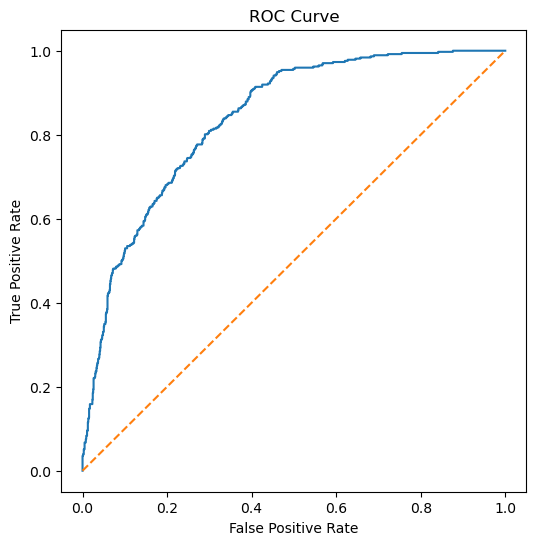

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()